In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import sem

In [2]:
# Define constants
data_root = 'data/'
optim_modes = ['ssc', 'ssc4', 'ssc5', 'ssc6', 'ssco', 'abo']
gametypes = ['all', 'rufspiel', 'farbwenz', 'geier', 'wenz', 'farbsolo', 'allesolos']
# Gametypes: {-1: Zamgworfen, 0: 'Ramsch', 1: 'Rufspiel',
#              2: 'Farbwenz', 3: 'Geier', 4: 'Wenz', 5: 'Solo'}

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [3]:
# Create convenient dictionaries for execution times
data_kurze = {mode: dict() for mode in optim_modes}
data_lange = {mode: dict() for mode in optim_modes}
for om in optim_modes:
    df = pd.read_parquet(os.path.join(data_root, f'{om}.parquet'))
    for g, gametype in enumerate(gametypes):
        if gametype == 'all':
            dk = df[df.rule_kurze & (df.game_type > 0)]
            dl = df[~df.rule_kurze & (df.game_type > 0)]
        elif gametype == 'allesolos':
            dk = df[df.rule_kurze & (df.game_type > 1)]
            dl = df[~df.rule_kurze & (df.game_type > 1)]
        else:
            dk = df[df.rule_kurze & (df.game_type == g)]
            dl = df[~df.rule_kurze & (df.game_type == g)]
        data_kurze[om][gametype] = np.array([*dk.execution_times.tolist()])
        data_lange[om][gametype] = np.array([*dl.execution_times.tolist()])
        print(f'[Kurze Karte, {om}, {gametype}]: mean ± SE = {dk.execution_time.mean():.3f} ± '
              f'{dk.execution_time.sem():.3f} sec (median={dk.execution_time.median():.3f} sec)')
        print(f'[Lange Karte, {om}, {gametype}]: mean ± SE = {dl.execution_time.mean():.1f} ± '
              f'{dl.execution_time.sem():.1f} sec (median={dl.execution_time.median():.1f} sec)')

[Kurze Karte, ssc, all]: mean ± SE = 0.379 ± 0.003 sec (median=0.289 sec)
[Lange Karte, ssc, all]: mean ± SE = 59.7 ± 0.9 sec (median=34.2 sec)
[Kurze Karte, ssc, rufspiel]: mean ± SE = 0.350 ± 0.004 sec (median=0.277 sec)
[Lange Karte, ssc, rufspiel]: mean ± SE = 49.6 ± 0.9 sec (median=30.2 sec)
[Kurze Karte, ssc, farbwenz]: mean ± SE = 0.347 ± 0.006 sec (median=0.259 sec)
[Lange Karte, ssc, farbwenz]: mean ± SE = 59.6 ± 4.1 sec (median=38.2 sec)
[Kurze Karte, ssc, geier]: mean ± SE = 0.426 ± 0.009 sec (median=0.330 sec)
[Lange Karte, ssc, geier]: mean ± SE = 111.0 ± 10.9 sec (median=73.4 sec)
[Kurze Karte, ssc, wenz]: mean ± SE = 0.441 ± 0.007 sec (median=0.359 sec)
[Lange Karte, ssc, wenz]: mean ± SE = 111.8 ± 4.4 sec (median=79.4 sec)
[Kurze Karte, ssc, farbsolo]: mean ± SE = 0.371 ± 0.005 sec (median=0.266 sec)
[Lange Karte, ssc, farbsolo]: mean ± SE = 64.2 ± 2.6 sec (median=33.9 sec)
[Kurze Karte, ssc, allesolos]: mean ± SE = 0.390 ± 0.003 sec (median=0.296 sec)
[Lange Karte, ssc

In [4]:
# Print optimizer modes with the lowest executition times depending on
# Kurze/Lange Karte, gametype and Ausspiel.

print('Kurze Karte')
for g, gametype in enumerate(('rufspiel', 'farbwenz', 'geier', 'wenz', 'farbsolo')):
    inds_min = np.argmin(np.vstack([data_kurze[mode][gametype].mean(axis=0) for mode in optim_modes]), axis=0)
    print(f'\t{gametype}: {[f"Ab Ausspiel {ausspiel+1}: {optim_modes[i]}" for ausspiel, i in
                            enumerate(inds_min) if ausspiel == 0 or i != inds_min[ausspiel - 1]]}')
print('Lange Karte')
for g, gametype in enumerate(('rufspiel', 'farbwenz', 'geier', 'wenz', 'farbsolo')):
    inds_min = np.argmin(np.vstack([data_lange[mode][gametype].mean(axis=0) for mode in optim_modes]), axis=0)
    print(f'\t{gametype}: {[f"Ab Ausspiel {ausspiel+1}: {optim_modes[i]}" for ausspiel, i in
                            enumerate(inds_min) if ausspiel == 0 or i != inds_min[ausspiel - 1]]}')

Kurze Karte
	rufspiel: ['Ab Ausspiel 1: abo', 'Ab Ausspiel 8: ssc']
	farbwenz: ['Ab Ausspiel 1: ssco', 'Ab Ausspiel 3: ssc', 'Ab Ausspiel 4: abo', 'Ab Ausspiel 5: ssc']
	geier: ['Ab Ausspiel 1: ssc']
	wenz: ['Ab Ausspiel 1: ssc']
	farbsolo: ['Ab Ausspiel 1: ssc4', 'Ab Ausspiel 3: abo', 'Ab Ausspiel 5: ssc']
Lange Karte
	rufspiel: ['Ab Ausspiel 1: abo', 'Ab Ausspiel 17: ssc']
	farbwenz: ['Ab Ausspiel 1: ssco', 'Ab Ausspiel 8: abo', 'Ab Ausspiel 9: ssco', 'Ab Ausspiel 10: abo', 'Ab Ausspiel 17: ssc']
	geier: ['Ab Ausspiel 1: ssco', 'Ab Ausspiel 10: abo', 'Ab Ausspiel 16: ssc']
	wenz: ['Ab Ausspiel 1: ssco', 'Ab Ausspiel 11: abo', 'Ab Ausspiel 17: ssc']
	farbsolo: ['Ab Ausspiel 1: ssc5', 'Ab Ausspiel 3: ssco', 'Ab Ausspiel 4: ssc5', 'Ab Ausspiel 5: ssco', 'Ab Ausspiel 8: abo', 'Ab Ausspiel 9: ssco', 'Ab Ausspiel 10: abo', 'Ab Ausspiel 17: ssc']


In [5]:
print("""
Suggested simplification considering the uncertainty of estimates
and discounting minimal benefits:

Kurze Karte
    Rufspiel: Ausspiel 1-7 abo Rest ssc
    Farbwenz: Ausspiel 1-4 ssco, Rest ssc
    Geier: ssc
    Wenz: ssc
    Farbsolo: Ausspiel 1-2 ssco, Ausspiel 3-4 abo, Rest ssc
Lange Karte
    Rufspiel: Ausspiel 1-16 abo, Rest ssc
    Farbwenz: Ausspiel 1-7 ssco, Ausspiel 8-16 abo, Rest ssc
    Geier: Ausspiel 1-9 ssco, Ausspiel 10-15 abo, Rest ssc
    Wenz: Ausspiel 1-10 ssco, Ausspiel 11-16 abo, Rest ssc
    Farbsolo: Ausspiel 1-9 ssco, Ausspiel 10-16 abo, Rest ssc
""")


Suggested simplification considering the uncertainty of estimates
and discounting minimal benefits:

Kurze Karte
    Rufspiel: Ausspiel 1-7 abo Rest ssc
    Farbwenz: Ausspiel 1-4 ssco, Rest ssc
    Geier: ssc
    Wenz: ssc
    Farbsolo: Ausspiel 1-2 ssco, Ausspiel 3-4 abo, Rest ssc
Lange Karte
    Rufspiel: Ausspiel 1-16 abo, Rest ssc
    Farbwenz: Ausspiel 1-7 ssco, Ausspiel 8-16 abo, Rest ssc
    Geier: Ausspiel 1-9 ssco, Ausspiel 10-15 abo, Rest ssc
    Wenz: Ausspiel 1-10 ssco, Ausspiel 11-16 abo, Rest ssc
    Farbsolo: Ausspiel 1-9 ssco, Ausspiel 10-16 abo, Rest ssc



In [6]:
def plot_execution_times(karte='kurze', gametype='all', subtract_mean=False, start_ausspiel=0):
    """

    Args:
        karte (str): "kurze" or "lange"
        gametype (str): one of ('all', 'rufspiel', 'farbwenz', 'geier', 'wenz', 'farbsolo', 'allesolos')
        subtract_mean (bool): if True, subtract the mean across all optimizers for each Ausspiel
        start_ausspiel (int): first Ausspiel to consider

    """
    if karte == 'kurze':
        data = data_kurze
        n_ausspiele = 20  # omits last round
    else:
        data = data_lange
        n_ausspiele = 28  # omits last round

    fig, ax = plt.subplots(figsize=(7, 5))
    for i, om in enumerate(optim_modes):
        if subtract_mean:
            mean_across_modes = np.mean([np.mean(data[om][gametype], axis=0) for om in optim_modes], axis=0)
            y = (np.mean(data[om][gametype], axis=0) - mean_across_modes)[start_ausspiel:]
        else:
            y = np.mean(data[om][gametype], axis=0)[start_ausspiel:]
        plt.plot(y, label=om, color=colors[i], lw=2)
        se = sem(data[om][gametype], axis=0)[start_ausspiel:]
        plt.fill_between(range(n_ausspiele-start_ausspiel), y - se, y + se, color=colors[i], alpha=0.3, ec='none')
    plt.xticks(range(n_ausspiele-start_ausspiel), range(1+start_ausspiel, n_ausspiele + 1))
    plt.xlim(-0.2, n_ausspiele-1-start_ausspiel)
    if not subtract_mean:
        plt.ylim(0, ax.get_ylim()[1])
    plt.ylabel(f'{"Δ " if subtract_mean else ""}Execution time [sec]')
    plt.xlabel('Ausspiel')
    plt.title(f'{karte.capitalize()} Karte ({gametype=}, {start_ausspiel=})')
    plt.legend()

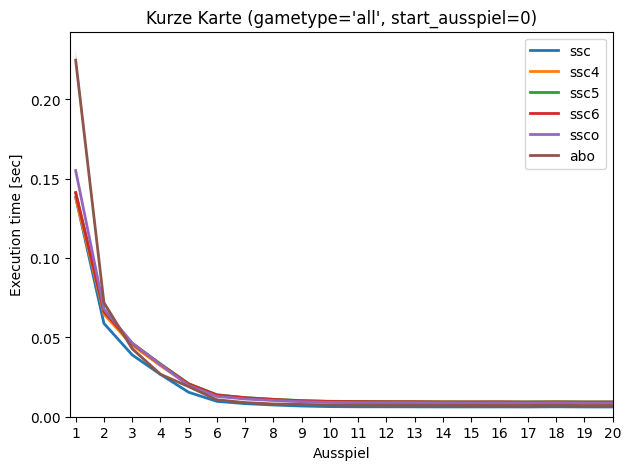

In [7]:
plot_execution_times(karte='kurze', gametype='all', subtract_mean=False, start_ausspiel=0)

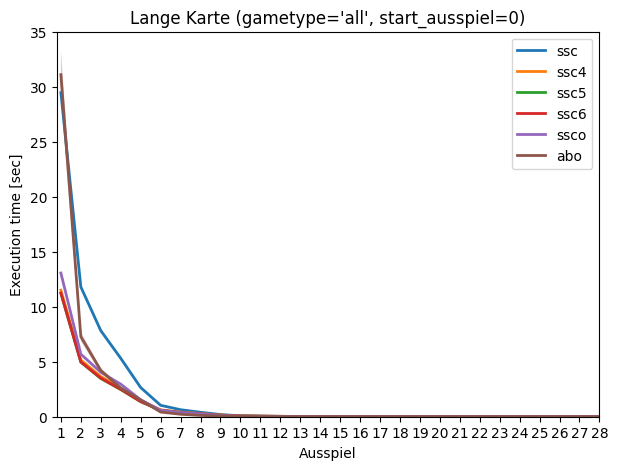

In [8]:
plot_execution_times(karte='lange', gametype='all', subtract_mean=False, start_ausspiel=0)

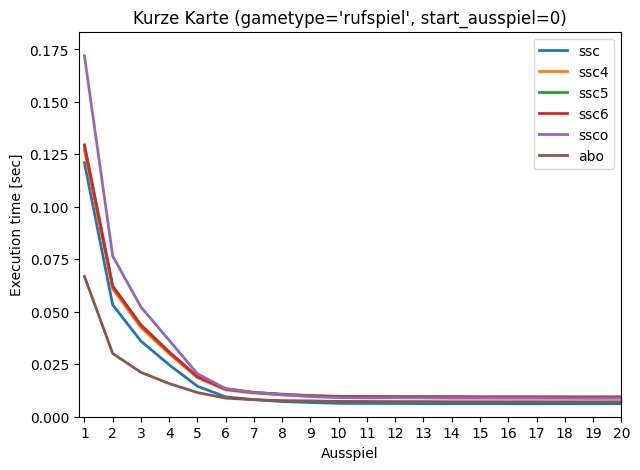

In [9]:
plot_execution_times(karte='kurze', gametype='rufspiel', start_ausspiel=0)

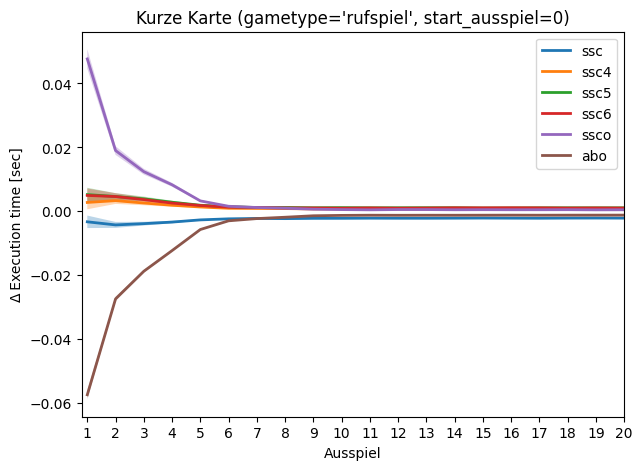

In [10]:
plot_execution_times(karte='kurze', gametype='rufspiel', subtract_mean=True, start_ausspiel=0)

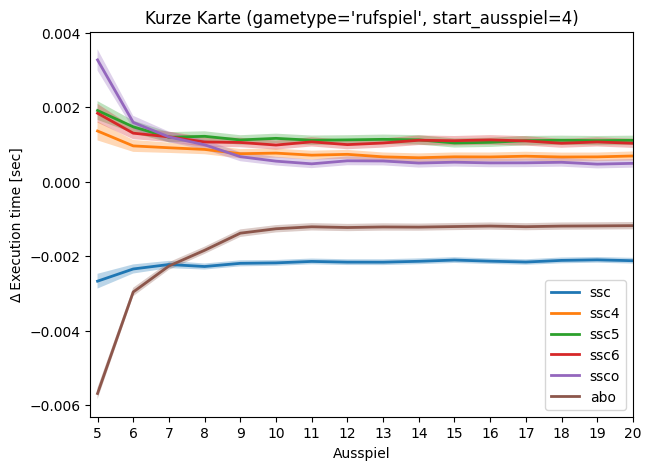

In [11]:
plot_execution_times(karte='kurze', gametype='rufspiel', subtract_mean=True, start_ausspiel=4)

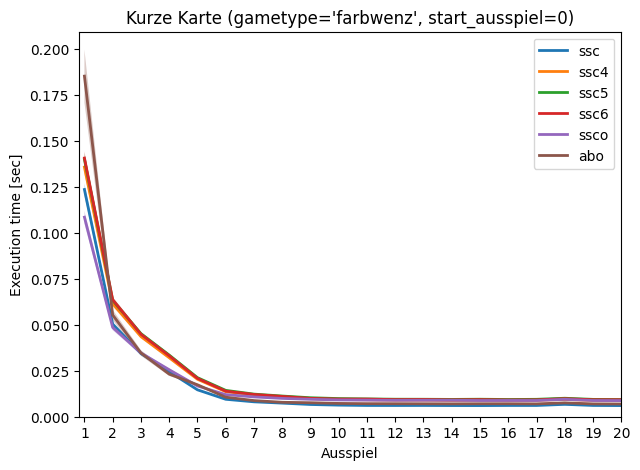

In [12]:
plot_execution_times(karte='kurze', gametype='farbwenz', start_ausspiel=0)

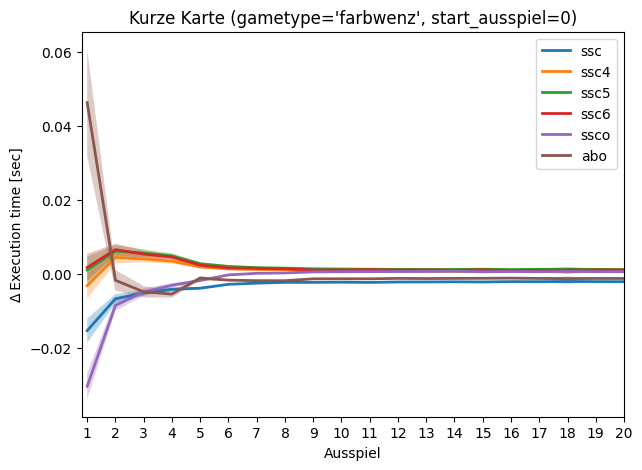

In [13]:
plot_execution_times(karte='kurze', gametype='farbwenz', subtract_mean=True, start_ausspiel=0)

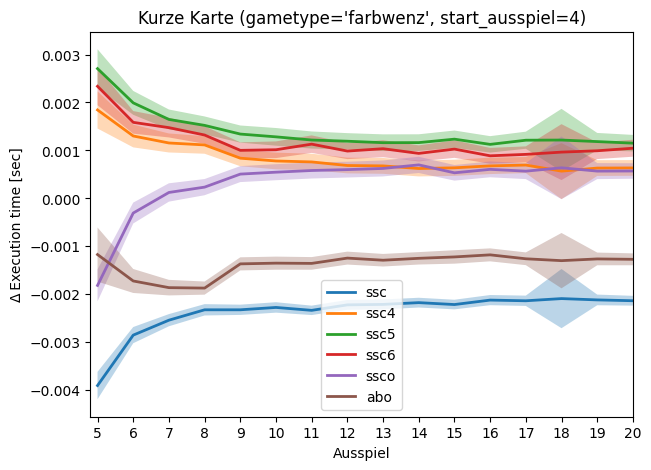

In [14]:
plot_execution_times(karte='kurze', gametype='farbwenz', subtract_mean=True, start_ausspiel=4)

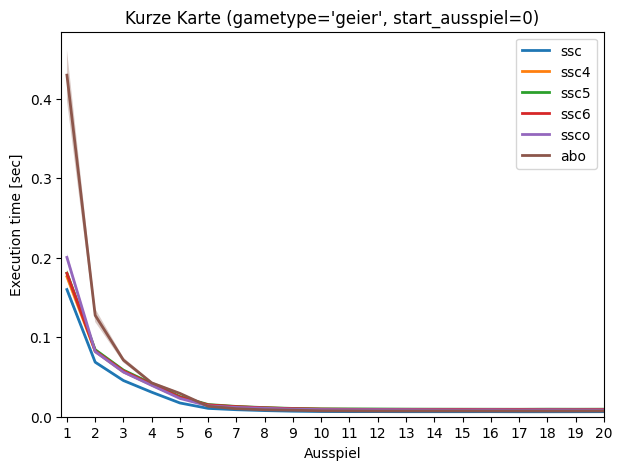

In [15]:
plot_execution_times(karte='kurze', gametype='geier', start_ausspiel=0)

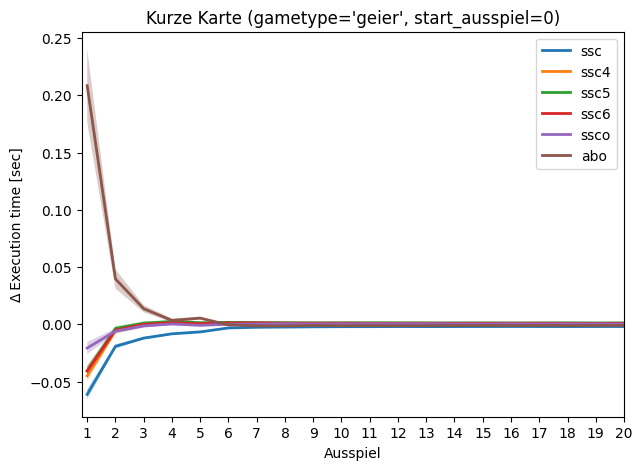

In [16]:
plot_execution_times(karte='kurze', gametype='geier', subtract_mean=True, start_ausspiel=0)


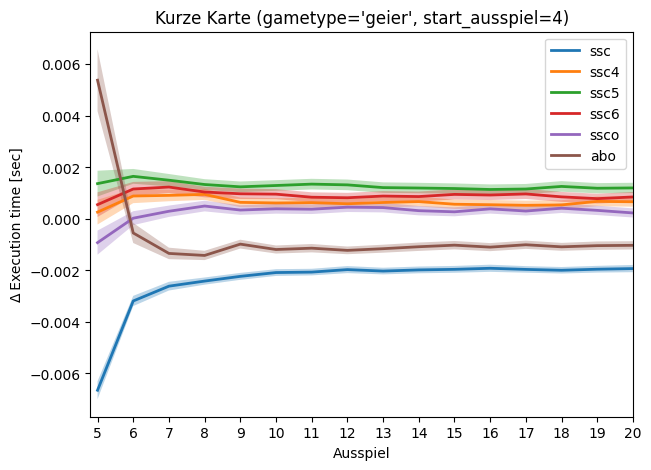

In [17]:
plot_execution_times(karte='kurze', gametype='geier', subtract_mean=True, start_ausspiel=4)


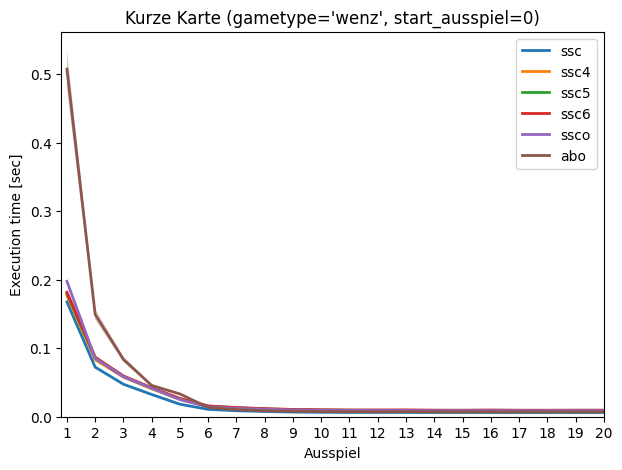

In [18]:
plot_execution_times(karte='kurze', gametype='wenz', start_ausspiel=0)

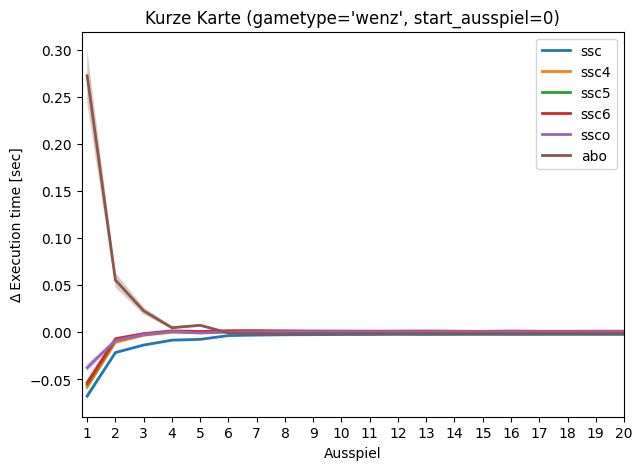

In [19]:
plot_execution_times(karte='kurze', gametype='wenz', subtract_mean=True, start_ausspiel=0)

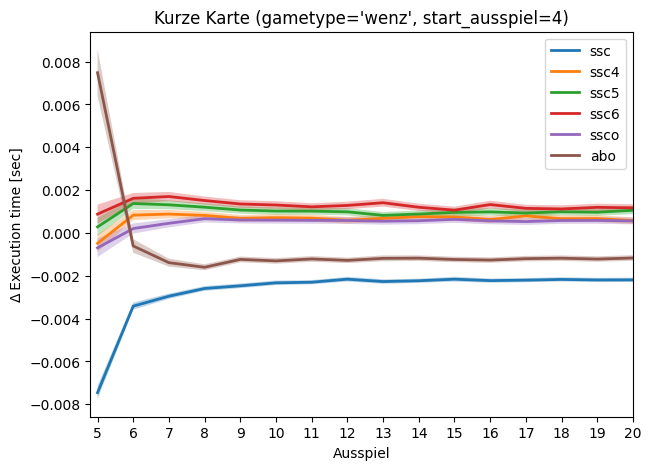

In [20]:
plot_execution_times(karte='kurze', gametype='wenz', subtract_mean=True, start_ausspiel=4)

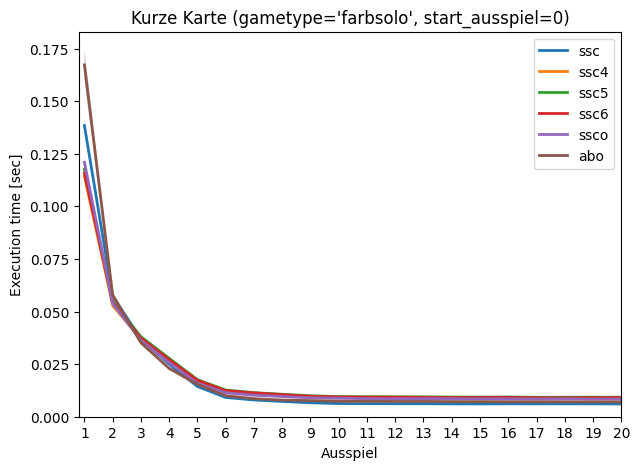

In [21]:
plot_execution_times(karte='kurze', gametype='farbsolo', start_ausspiel=0)

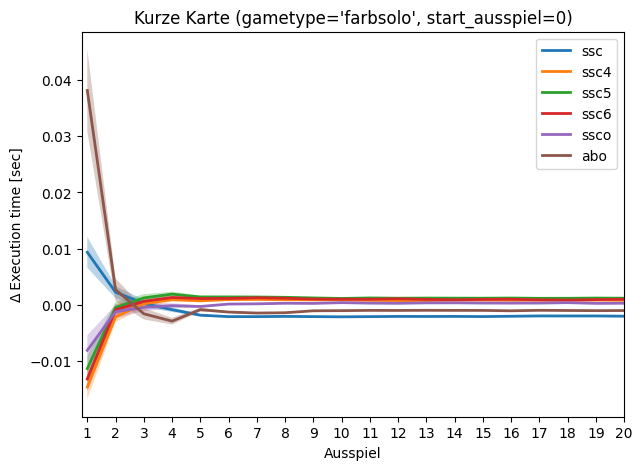

In [22]:
plot_execution_times(karte='kurze', gametype='farbsolo', subtract_mean=True, start_ausspiel=0)

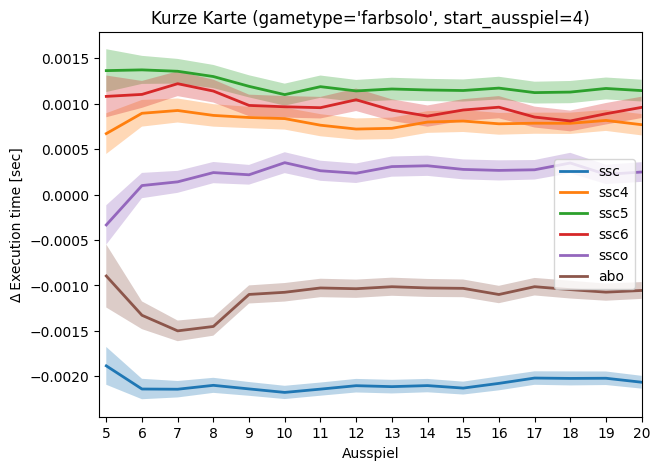

In [23]:
plot_execution_times(karte='kurze', gametype='farbsolo', subtract_mean=True, start_ausspiel=4)

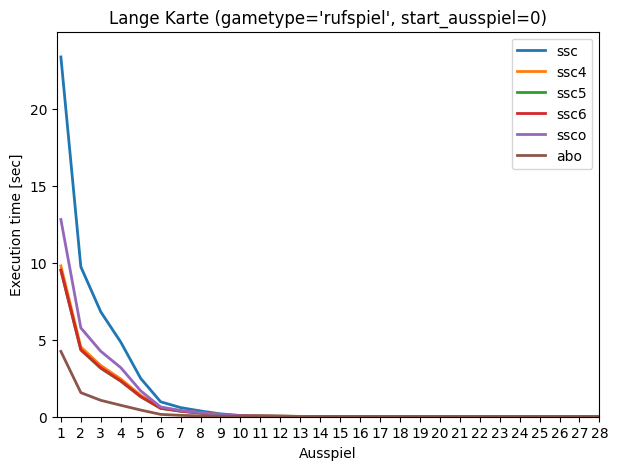

In [24]:
plot_execution_times(karte='lange', gametype='rufspiel', start_ausspiel=0)

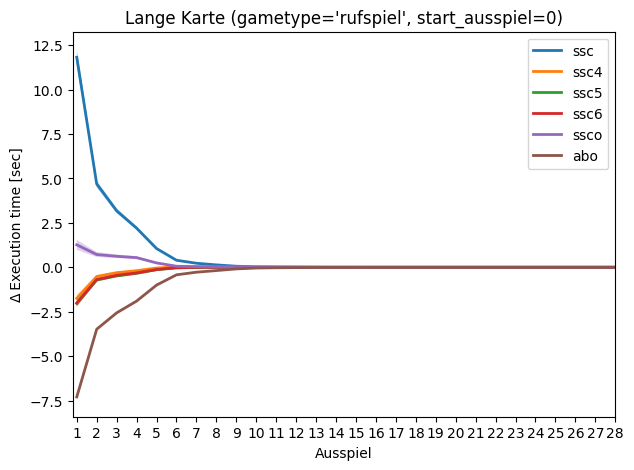

In [25]:
plot_execution_times(karte='lange', gametype='rufspiel', subtract_mean=True, start_ausspiel=0)

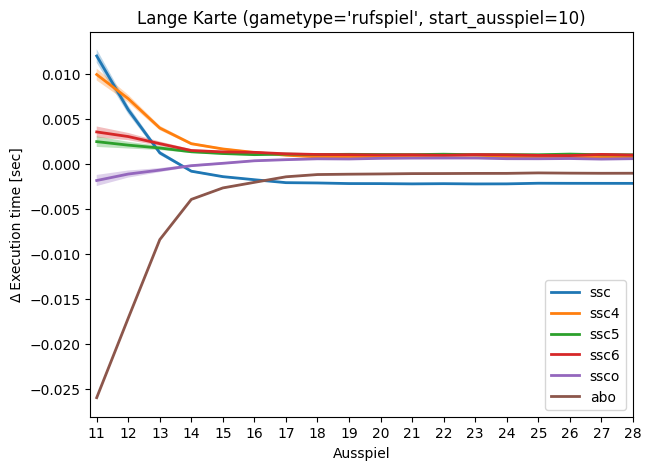

In [26]:
plot_execution_times(karte='lange', gametype='rufspiel', subtract_mean=True, start_ausspiel=10)

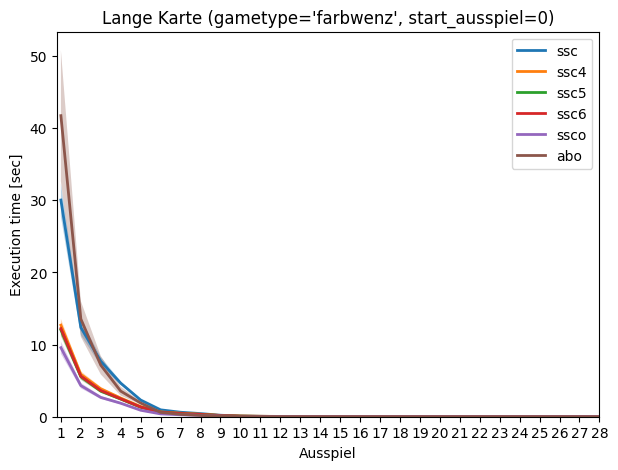

In [27]:
plot_execution_times(karte='lange', gametype='farbwenz', start_ausspiel=0)

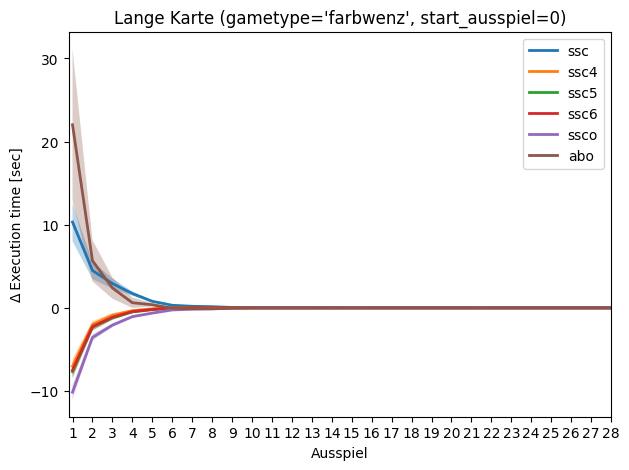

In [28]:
plot_execution_times(karte='lange', gametype='farbwenz', subtract_mean=True, start_ausspiel=0)

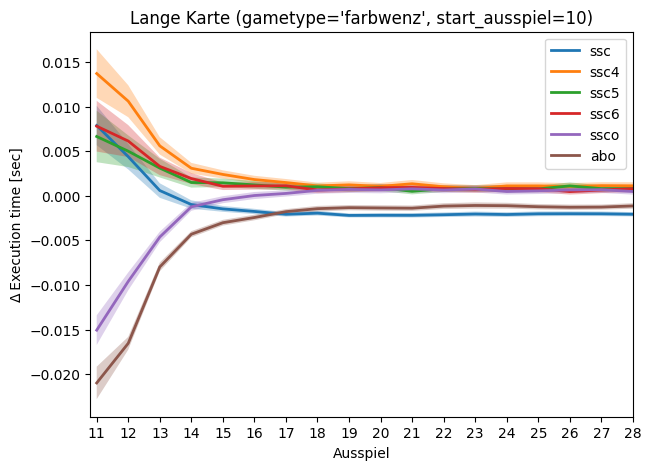

In [29]:
plot_execution_times(karte='lange', gametype='farbwenz', subtract_mean=True, start_ausspiel=10)

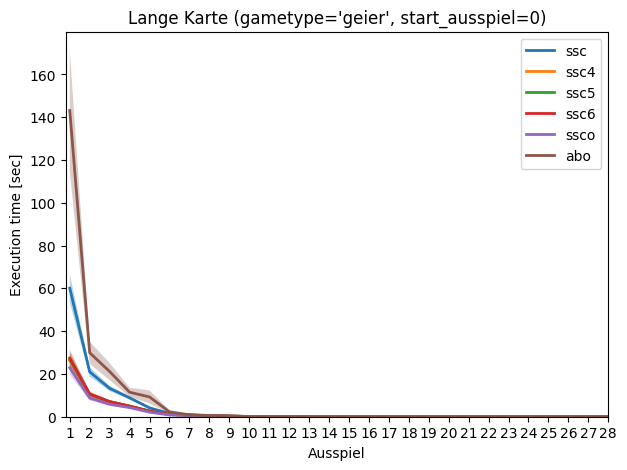

In [30]:
plot_execution_times(karte='lange', gametype='geier', start_ausspiel=0)

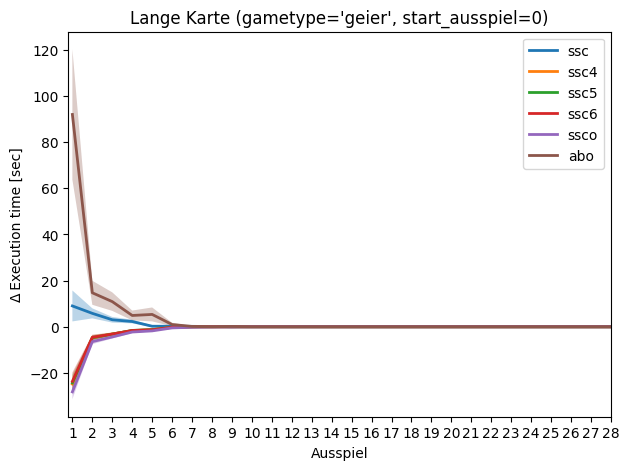

In [31]:
plot_execution_times(karte='lange', gametype='geier', subtract_mean=True, start_ausspiel=0)

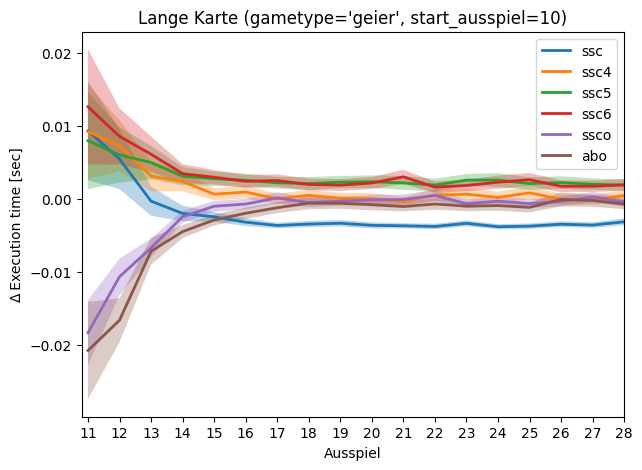

In [32]:
plot_execution_times(karte='lange', gametype='geier', subtract_mean=True, start_ausspiel=10)

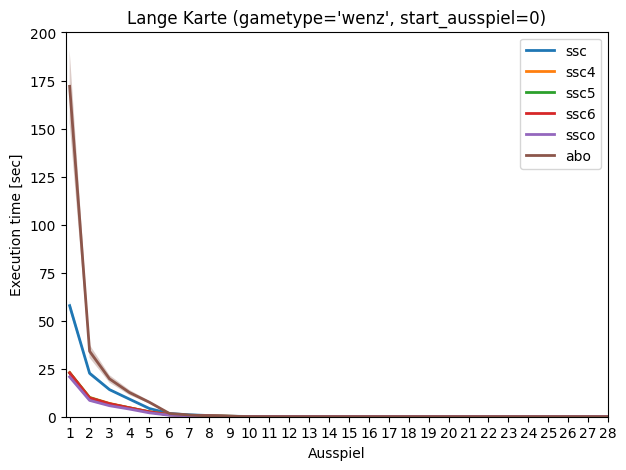

In [33]:
plot_execution_times(karte='lange', gametype='wenz', start_ausspiel=0)

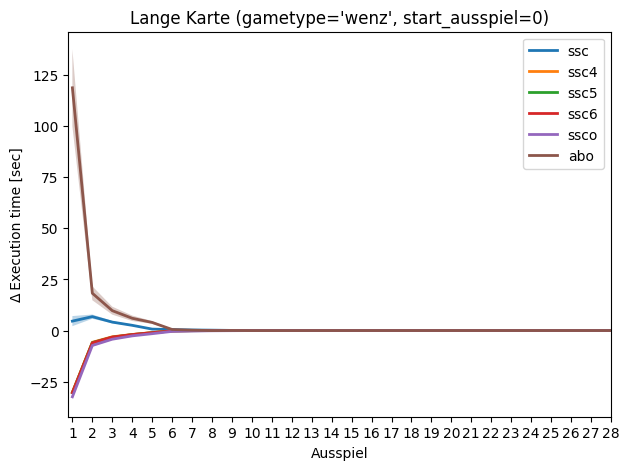

In [34]:
plot_execution_times(karte='lange', gametype='wenz', subtract_mean=True, start_ausspiel=0)

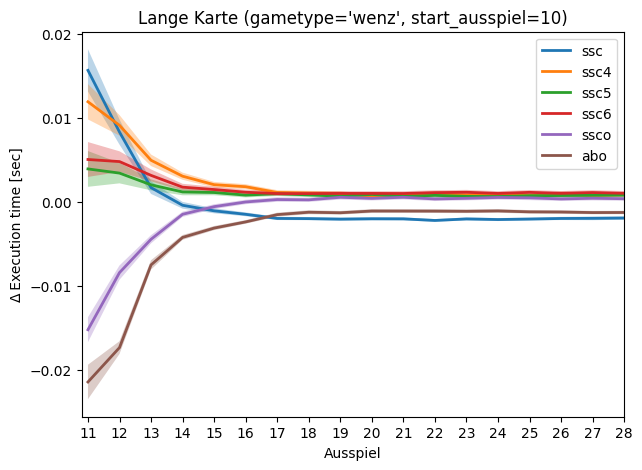

In [35]:
plot_execution_times(karte='lange', gametype='wenz', subtract_mean=True, start_ausspiel=10)

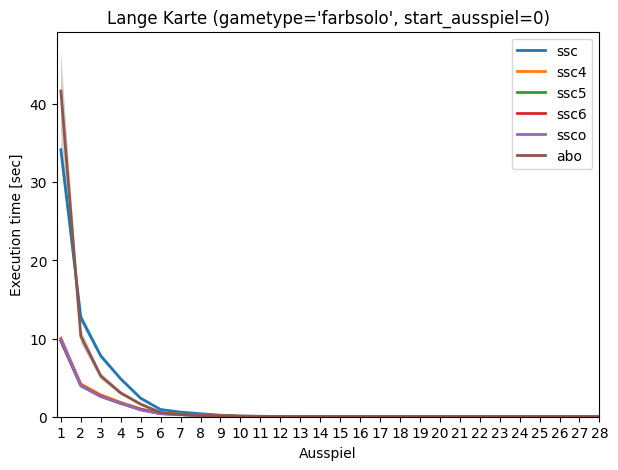

In [36]:
plot_execution_times(karte='lange', gametype='farbsolo', start_ausspiel=0)

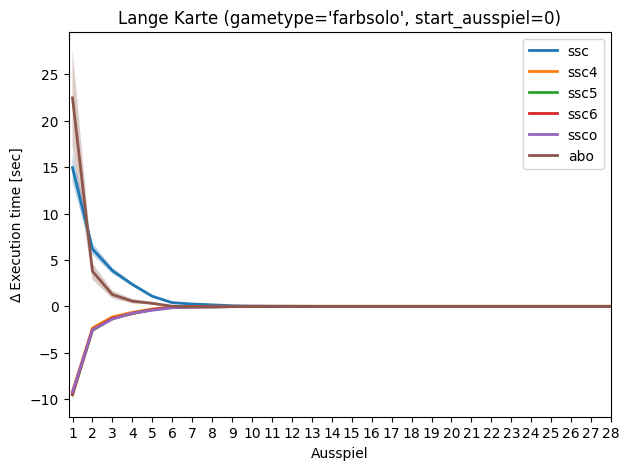

In [37]:
plot_execution_times(karte='lange', gametype='farbsolo', subtract_mean=True, start_ausspiel=0)

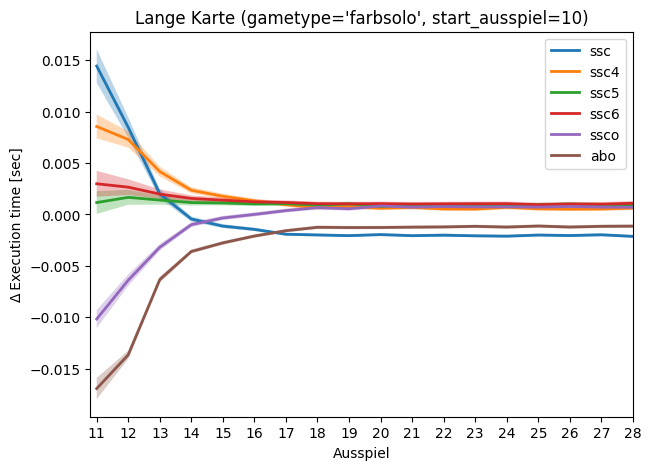

In [38]:
plot_execution_times(karte='lange', gametype='farbsolo', subtract_mean=True, start_ausspiel=10)